## 파이썬 라이브러리를 활용한 데이터 분석과 시각화

### numpy
* numpy는 n차원 데이터를 빠르고 쉽게 계산할 수 있게 해 주는 라이브러리입니다.
*  https://numpy.org/

### pandas
* pandas는 데이터 분석과 조작을 도와주는 라이브러리입니다.
*  https://pandas.pydata.org/

##  시각화 도구

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

### matplotlib
* https://matplotlib.org/

### matplotlib.pyplot
* pyplot은 matplotlib에 대한 상태 기반 인터페이스입니다.
* 파이썬의 가장 인기있는 데이터 시각화 도구입니다.
*  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### seaborn
* seaborn은 matplotlib에 기반한 통계적 데이터 시각화 지원 라이브러리입니다.
* pyplot을 사용하기 쉽게 추상화 한 시각화 도구 입니다.
*  https://seaborn.pydata.org/

### pandas visualization
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 저장한 Dataframe을 불러와 변수 df에 지정해줍니다.
# kosis-cancer.csv
df = pd.read_csv("data/kosis-cancer.csv")
df

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
0,20 ~ 24세,2016,위암,남자,0,0,20대
1,20 ~ 24세,2016,위암,여자,0,0,20대
2,20 ~ 24세,2016,대장암,남자,0,0,20대
3,20 ~ 24세,2016,대장암,여자,0,0,20대
4,20 ~ 24세,2016,간암,남자,0,0,20대
...,...,...,...,...,...,...,...
1233,85세 이상,2019,간암,여자,3592,914,80대
1234,85세 이상,2019,유방암,남자,0,0,80대
1235,85세 이상,2019,유방암,여자,171274,22476,80대
1236,85세 이상,2019,자궁경부암,남자,0,0,80대


## 한글폰트 설정하기

In [4]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 해줘야 한다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [5]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러와줍니다.
get_font_family()

'AppleGothic'

In [10]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'

### 폰트설정 확인하기

<AxesSubplot:title={'center':'한글'}>

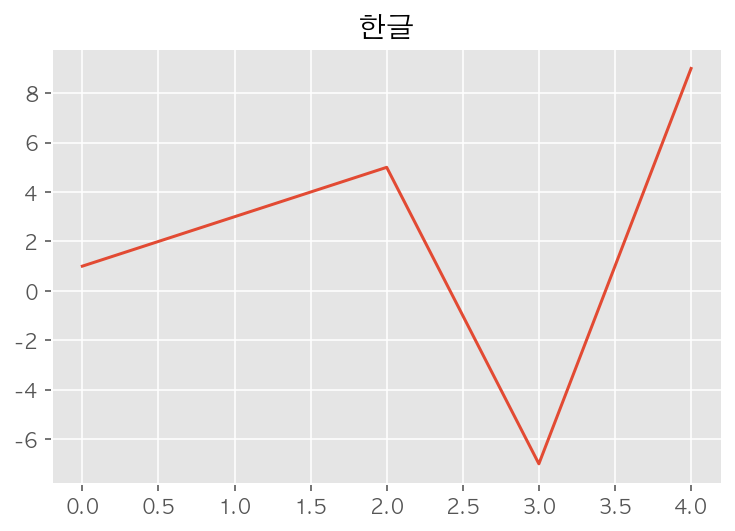

In [14]:
# 한글 폰트가 정상적으로 작동하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

In [16]:
# "암검진별" column의 value별 개수를 확인해 봅니다.
df["암검진별"].value_counts()

위암       252
간암       252
대장암      248
자궁경부암    244
유방암      242
Name: 암검진별, dtype: int64

<AxesSubplot:xlabel='암검진별', ylabel='count'>

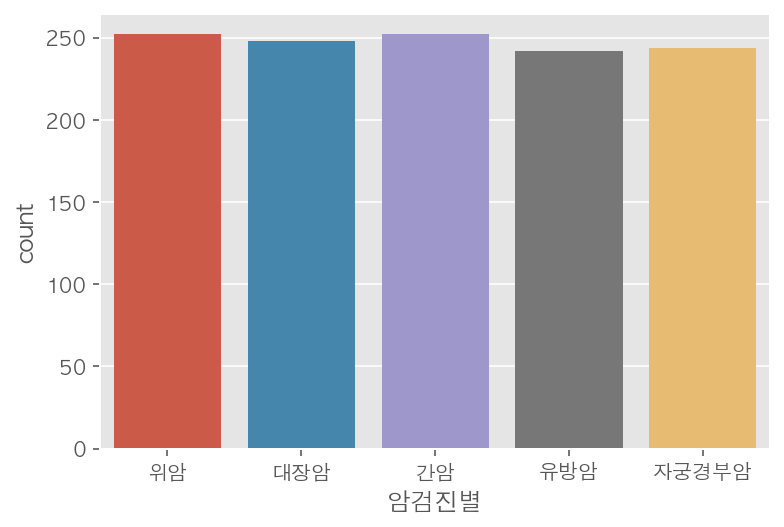

In [17]:
# seaborn을 활용하여 암검진별 빈도수를 표현할 수 있습니다.
sns.countplot(data=df, x="암검진별")

<AxesSubplot:xlabel='암검진별', ylabel='count'>

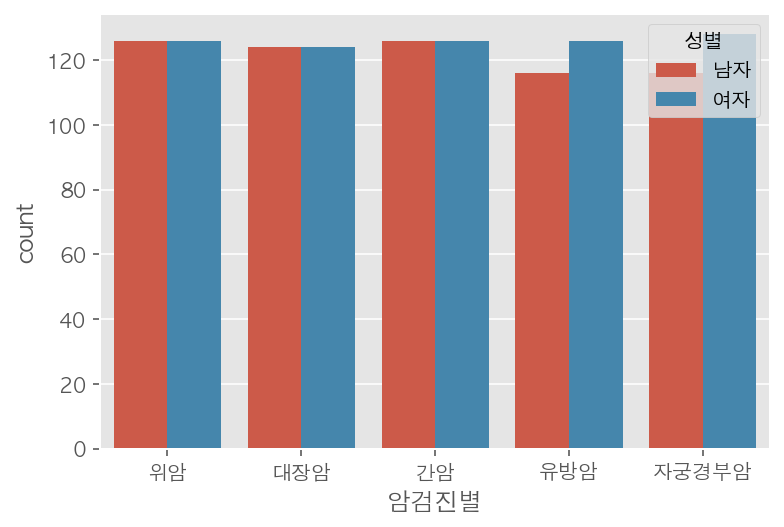

In [18]:
# seaborn countplot을 활용하여 암검진별 빈도수를 표현 합니다. hue="성별"에 따라 다른 색상으로 표현합니다.

sns.countplot(data=df, x="암검진별", hue="성별")

In [24]:
df["암검진별"].value_counts()

위암       252
간암       252
대장암      248
자궁경부암    244
유방암      242
Name: 암검진별, dtype: int64

In [23]:
# 데이터가 0 인것은 빈도수 계산에서 제외하도록
# 대상인원 이 0 보다 큰 데이터만 찾습니다.
df.loc[df["대상인원"] > 0, "암검진별"].value_counts()

위암       200
간암       200
대장암      160
자궁경부암    128
유방암      100
Name: 암검진별, dtype: int64

<AxesSubplot:>

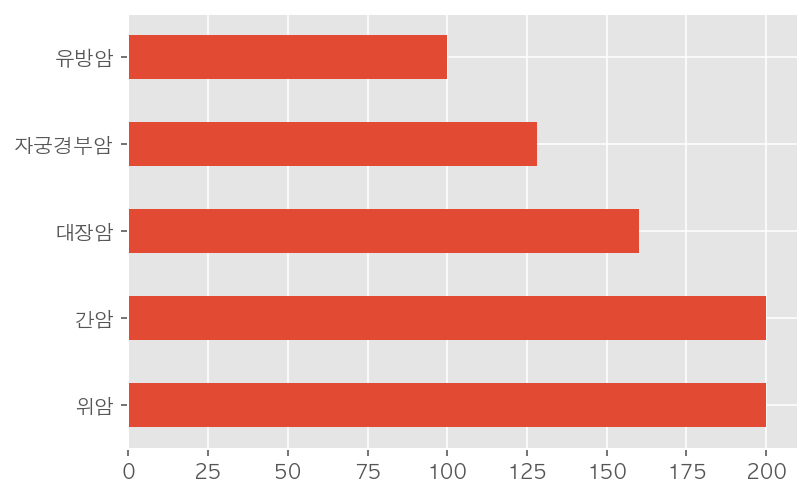

In [26]:
# 데이터 > 0 보다 큰 데이터로 빈도수 시각화 해보기

df.loc[df["대상인원"] > 0, "암검진별"].value_counts().plot.barh()

### crosstab 으로 두 개의 빈도수 구하기

In [27]:
# crosstab 으로 시각화 결과를 구하기 df["성별"], df["암검진별"]
# 남성의 경우 항목이 있는지 여부를 표시하고 있기 때문에 실제 대상인원은 0이라도 해당 항목이 표시됩니다.
pd.crosstab(index=df["성별"], columns=df["암검진별"])

암검진별,간암,대장암,위암,유방암,자궁경부암
성별,,,,,
남자,126,124,126,116,116
여자,126,124,126,126,128


## 수치형 데이터

array([[<AxesSubplot:title={'center':'시점'}>,
        <AxesSubplot:title={'center':'대상인원'}>],
       [<AxesSubplot:title={'center':'수검인원'}>, <AxesSubplot:>]],
      dtype=object)

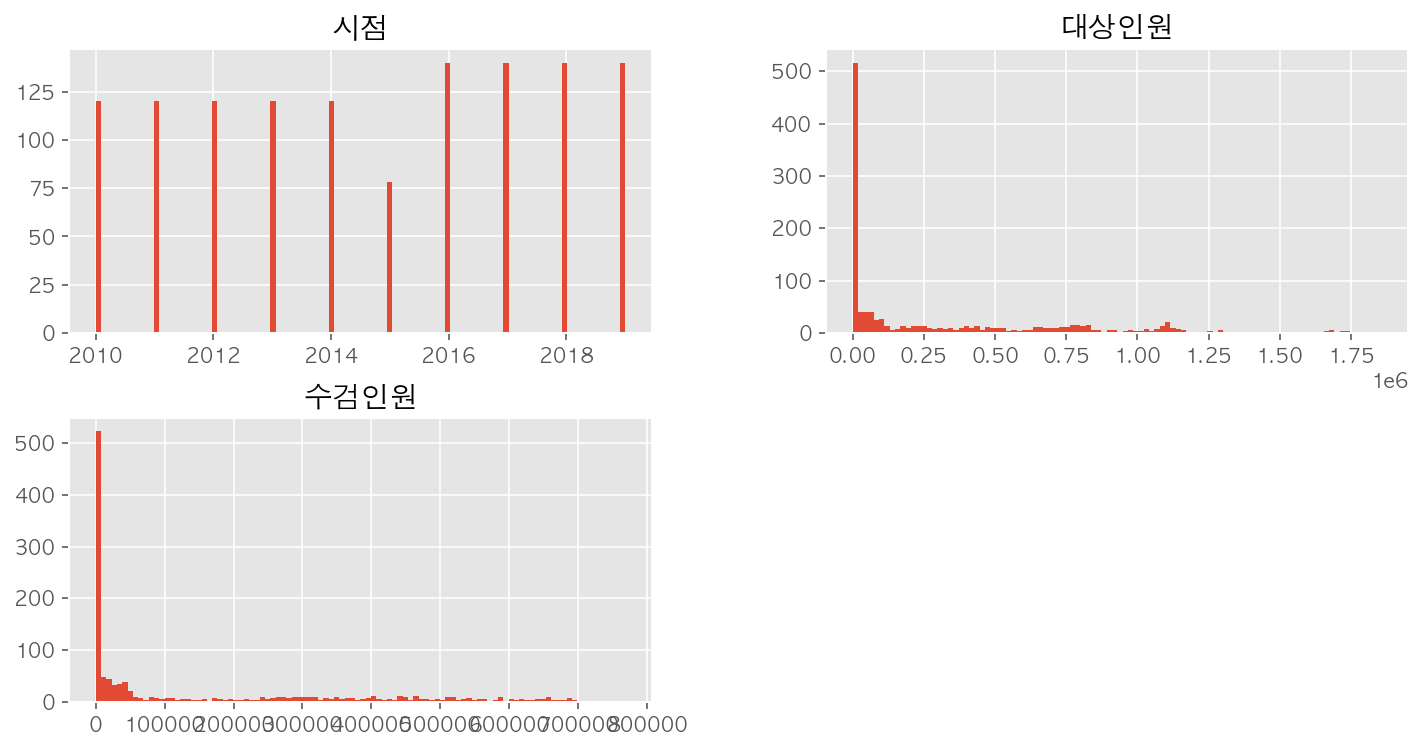

In [31]:
# .hist 를 사용하면 전체 수치 데이터에 대한 시각화를 할 수 있습니다.
df.hist(bins=100, figsize=(12, 6))

## 2019 년 데이터만 보기

In [37]:
# 2019년의 데이터를 확인하기 위해 2019년의 데이터만 지정해줍니다.
df_2019 = df[df["시점"] == 2019].copy()
df_2019.head()

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
30,20 ~ 24세,2019,위암,남자,0,0,20대
31,20 ~ 24세,2019,위암,여자,0,0,20대
32,20 ~ 24세,2019,대장암,남자,0,0,20대
33,20 ~ 24세,2019,대장암,여자,0,0,20대
34,20 ~ 24세,2019,간암,남자,0,0,20대


<AxesSubplot:xlabel='암검진별', ylabel='수검인원'>

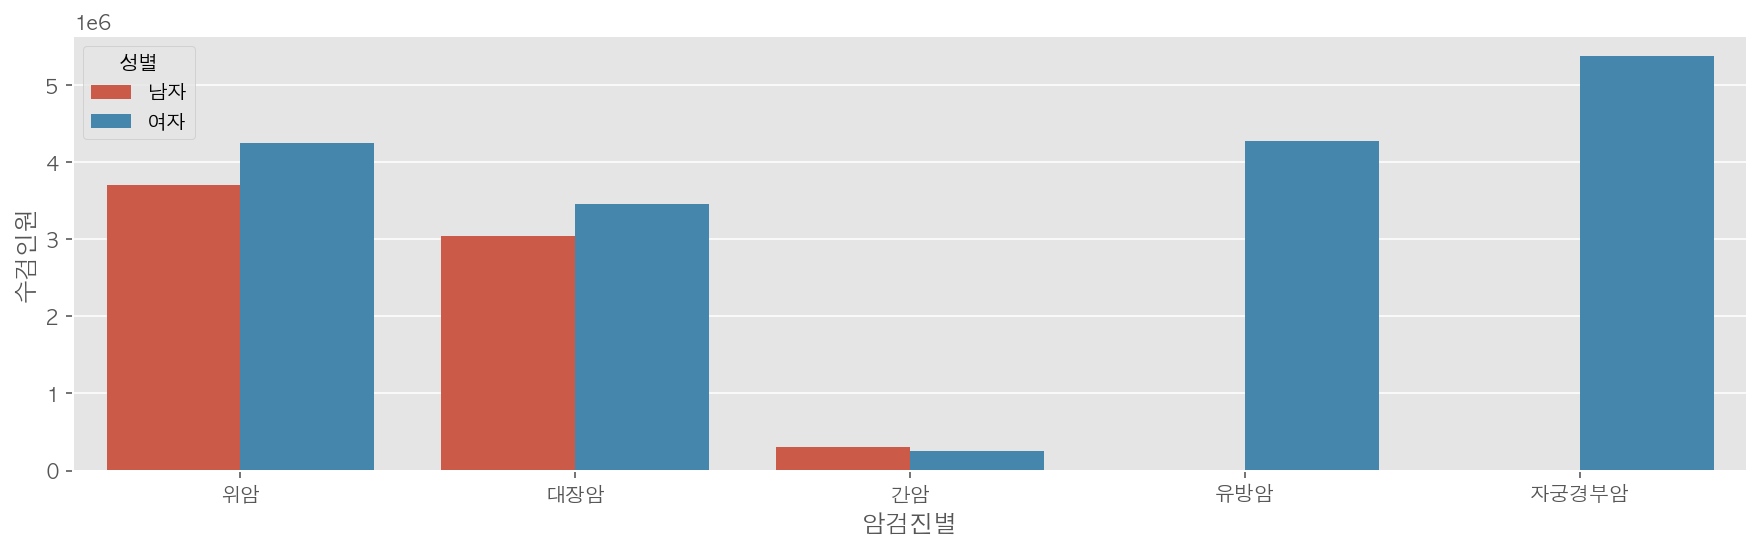

In [42]:
# seaborn의 barplot을 사용해서 데이터를 시각화 할 수 있습니다.
# x축에는 암검진별, y축에는 데이터, hue값에는 성별을 넣어줍니다.
# 2019년 남자와 여자의 암검진별 수검인원을 비교합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_2019, x="암검진별", y="수검인원", hue="성별", ci=None, estimator=np.sum)

<Figure size 1080x432 with 0 Axes>

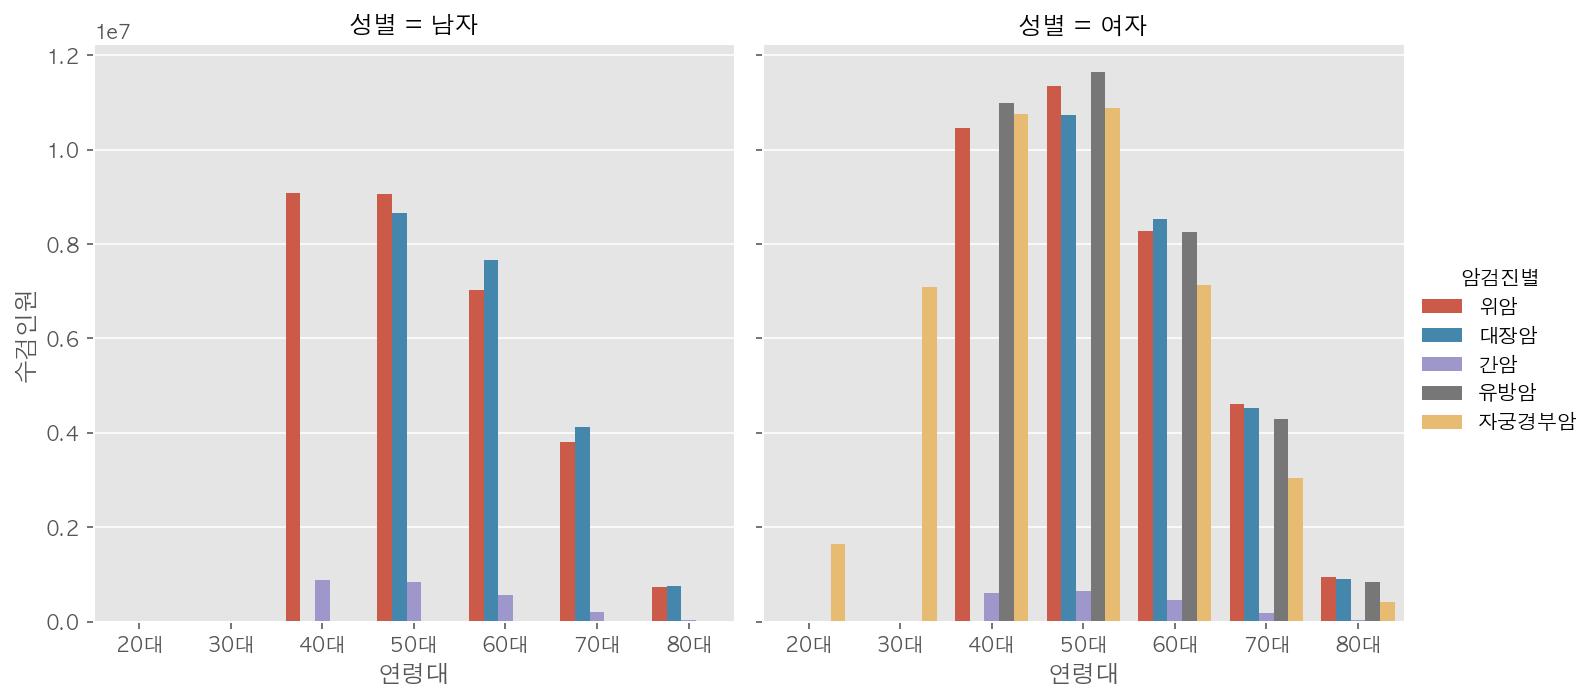

In [48]:
# 2019년의 x="연령별", y='수검인원', hue='암검진별', kind="bar", col="성별" 시각화
plt.figure(figsize=(15, 6))
sns.catplot(data=df, x="연령대", y="수검인원", hue="암검진별", 
            col="성별", kind="bar", estimator=np.sum, ci=None)

## 연도별 암검진 현황
### 평균 시각화

<AxesSubplot:xlabel='시점', ylabel='수검인원'>

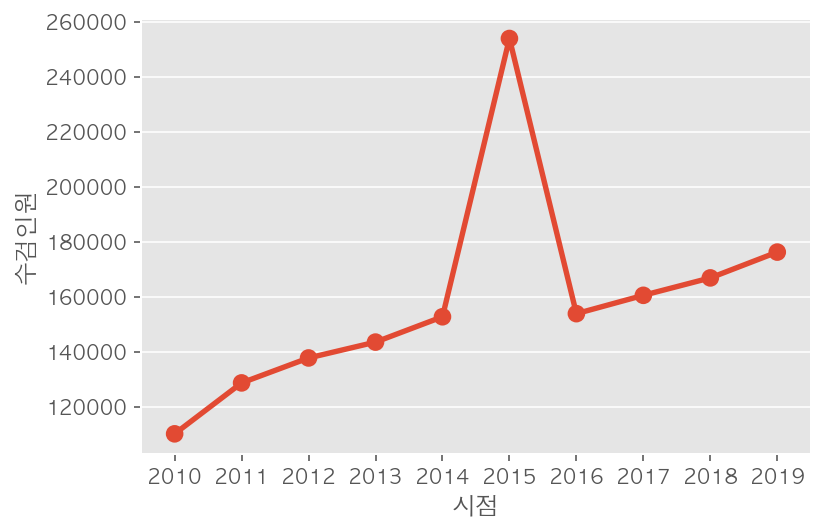

In [50]:
# pointplot 으로 연도별 암검진 **평균** 수검인원을 시각화 합니다.
sns.pointplot(data=df, x="시점", y="수검인원", ci=None)

### 합계 시각화

<AxesSubplot:xlabel='시점', ylabel='수검인원'>

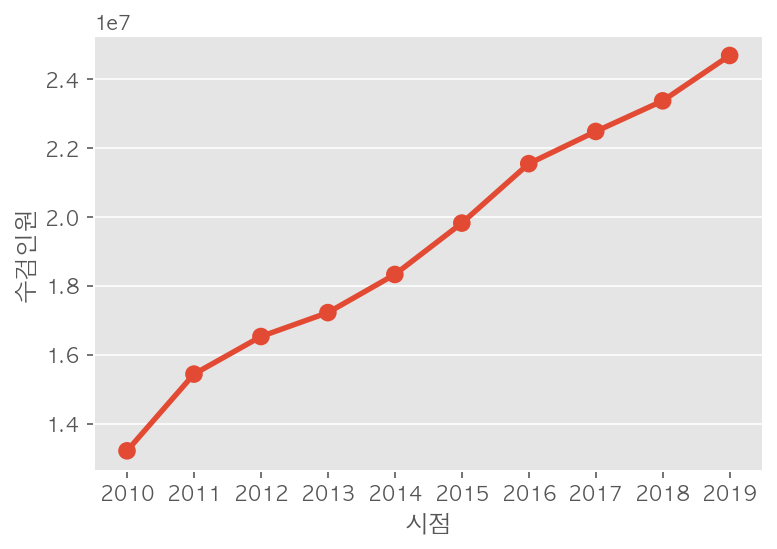

In [51]:
# pointplot 으로 연도별 암검진 **합계** 수검인원을 시각화 합니다.

sns.pointplot(data=df, x="시점", y="수검인원", ci=None, estimator=np.sum)

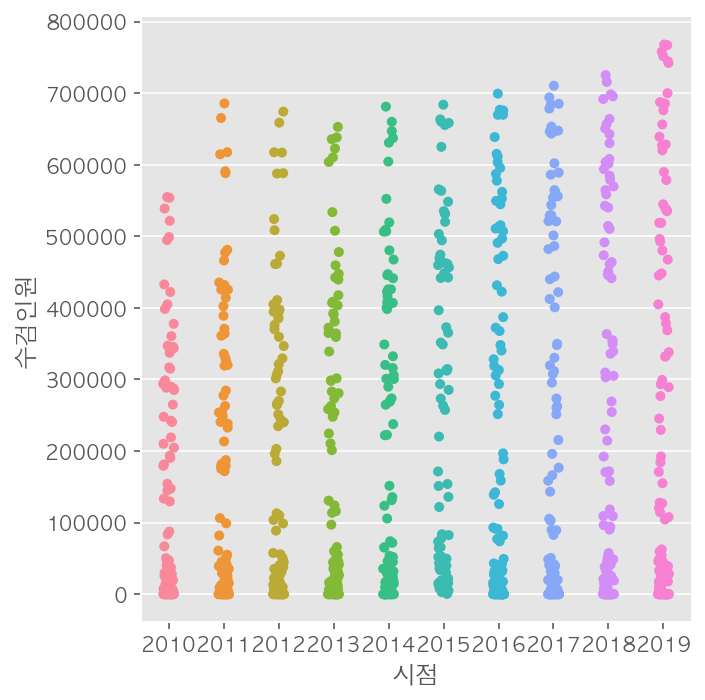

In [52]:
# catplot 으로 연도별 암검진 수검인원을 시각화 합니다.
sns.catplot(data=df, x="시점", y="수검인원")

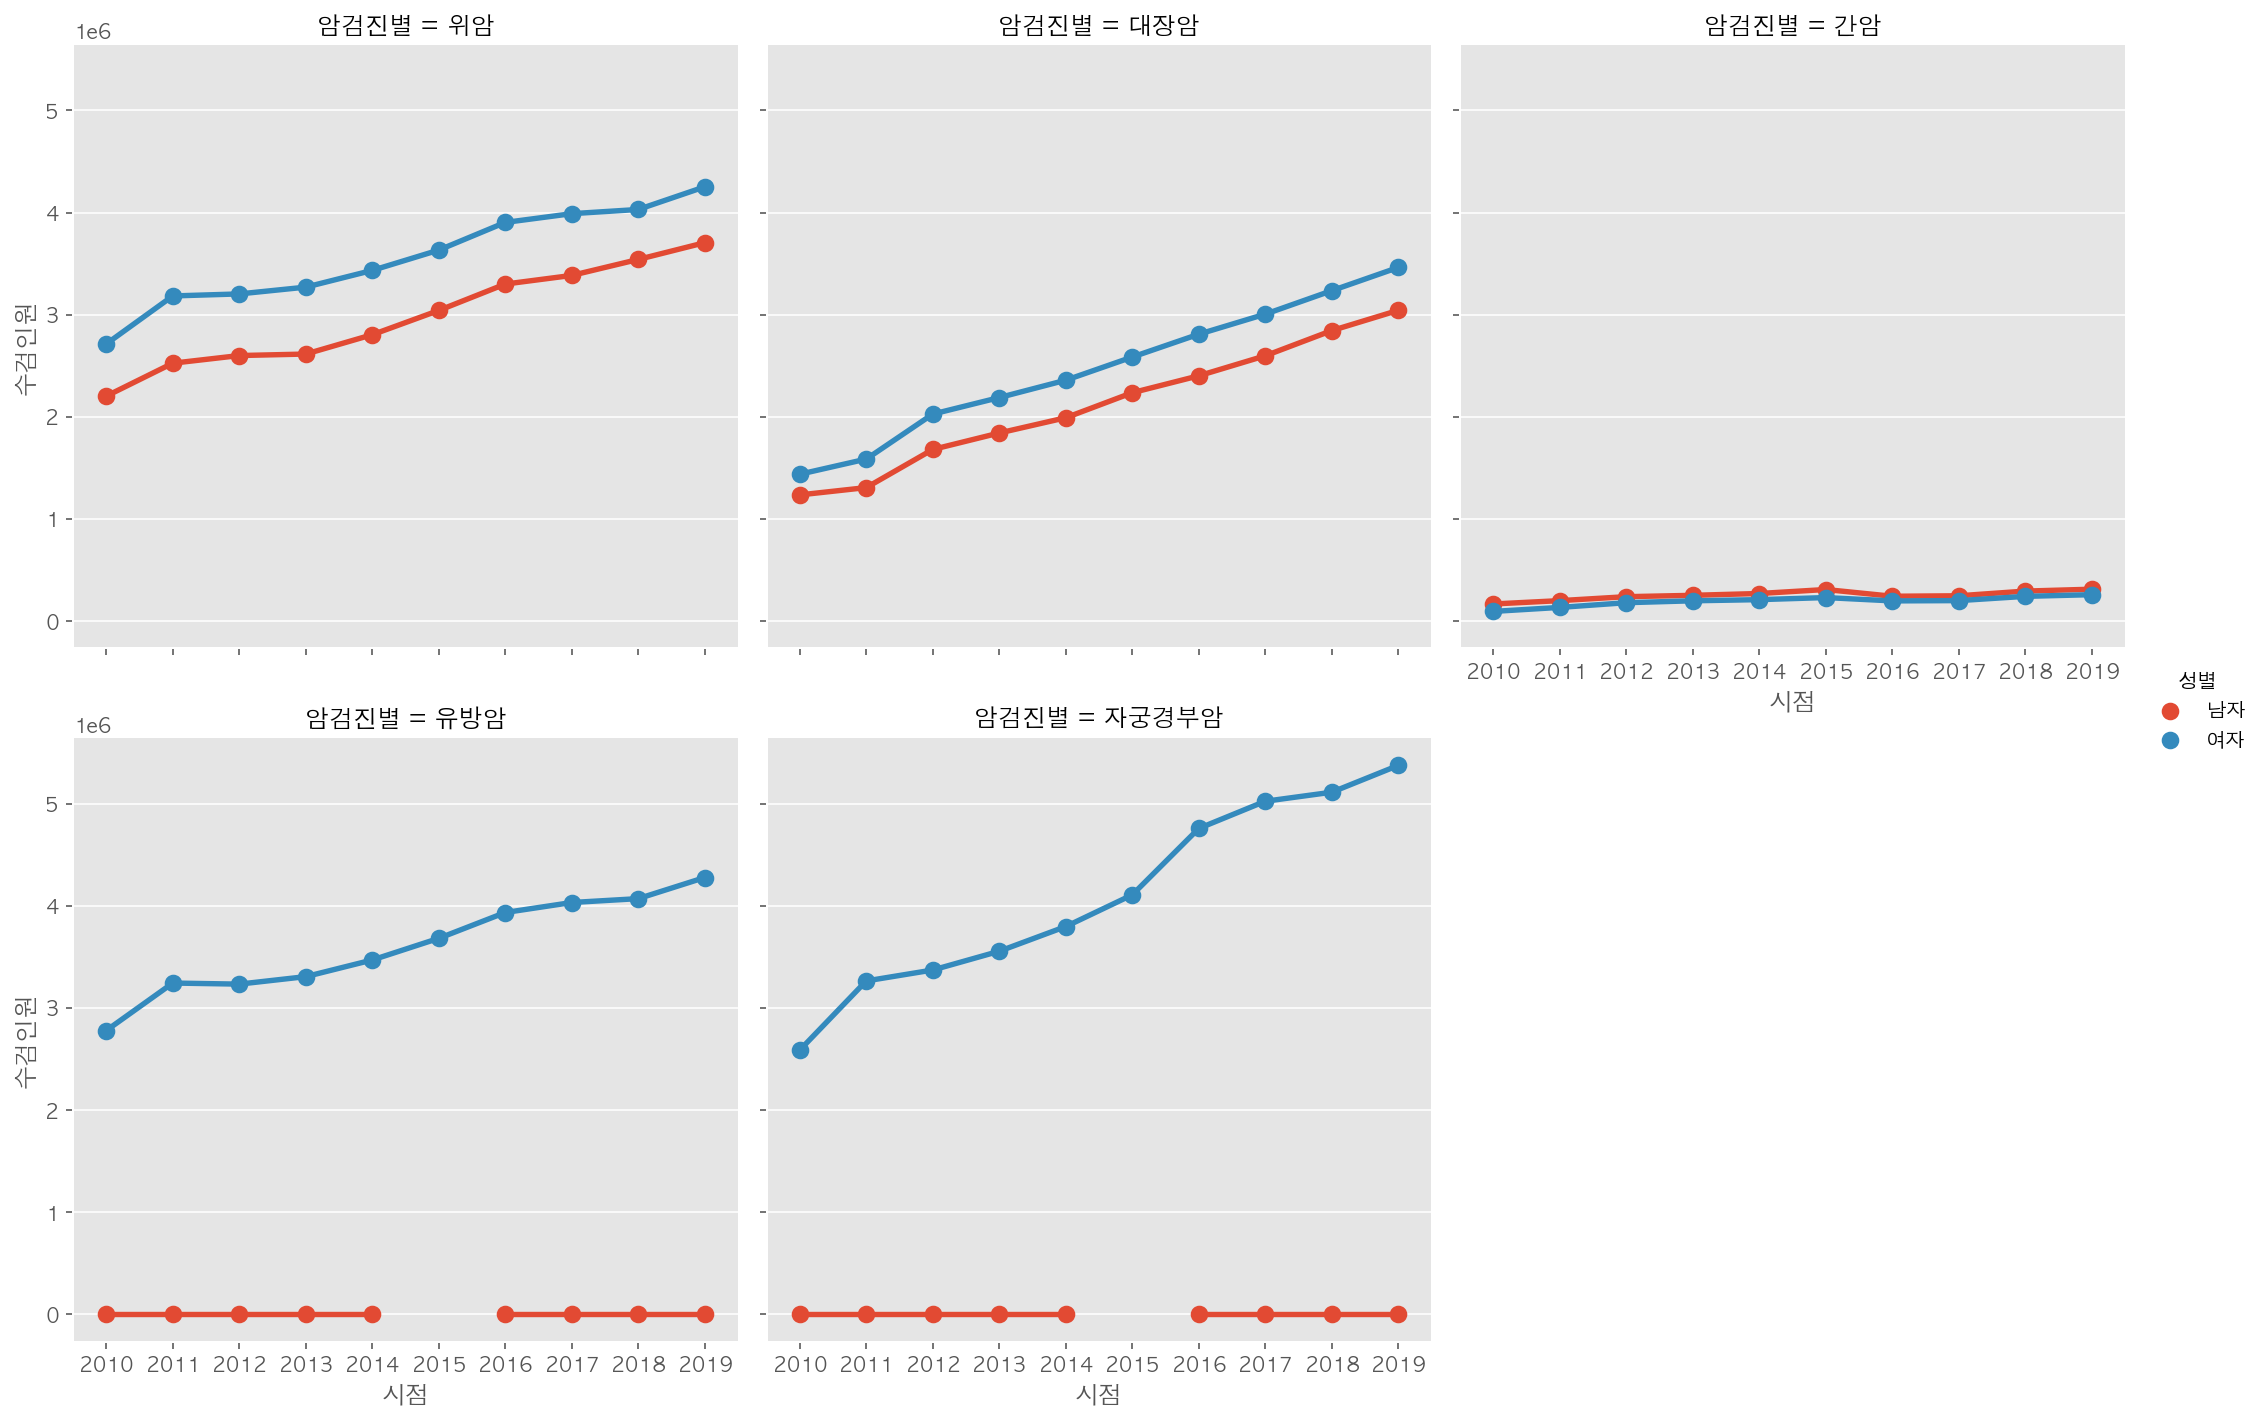

In [60]:
# catplot 으로 연도별 암검진 수검인원 **합계**를 pointplot으로 시각화 합니다.
sns.catplot(data=df, x="시점", y="수검인원", kind="point", 
            estimator=np.sum, ci=None, hue="성별", col="암검진별", col_wrap=3)

## groupby와 pivot_table활용해보기

<img src = 'https://pandas.pydata.org/docs/_images/06_groupby.svg' width="800">

<img src = 'https://pandas.pydata.org/docs/_images/reshaping_pivot.png' width = '600'>

In [64]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
df.groupby(by=["시점", "연령별"]).sum()

대상인원     수검인원
시점   연령별                       
2010 30 ~ 34세   487487   129509
     35 ~ 39세   428174   144880
     40 ~ 44세  4803993  2042323
     45 ~ 49세  3611552  1491612
     50 ~ 54세  6719271  2798926
...                ...      ...
2019 65 ~ 69세  3820834  2266502
     70 ~ 74세  3712996  2205109
     75 ~ 79세  2444304  1131863
     80 ~ 84세  1998071   650434
     85세 이상    1103938   144805

[128 rows x 2 columns]

In [69]:
# pivot_table로 같은 결과가 나오게 연산하기
pd.pivot_table(data=df, index="시점", columns="연령대", 
               aggfunc="sum", values="수검인원", fill_value=0)

연령대,20대,30대,40대,50대,60대,70대,80대
시점,,,,,,,
2010,0,274389,3533935,4642869,3133814,1440461,186776
2011,0,503397,3914357,5482910,3512717,1788981,235740
2012,0,576735,3848316,5727622,3926643,2150944,297896
2013,0,637679,4011937,5937390,4036869,2254606,343046
2014,0,694529,4129279,6163947,4474726,2450073,415543
2015,0,790572,4436662,6593738,4949353,2557788,490351
2016,335516,845125,4673448,6935630,5416575,2776806,558709
2017,417436,904046,4737311,7148717,5703856,2935851,629270
2018,424916,919442,4598820,7506389,6140446,3098932,675719
